Things that I need to cover:

- Simple Linear Regression
- Multiple Linear Regression
- Prediction using Regression
- Factor variables in Regression
- Interpreting the Regression Equation
- Regression Diagnostics - Outliers, Influential values, Correlated errors

## Linear Regression

- study the relationship between two quantitative (continuous) variables
- predict the value of an outcome variable based on one or more input predictor variable(s)

The aim is to establish a linear relationship (a mathematical formula) between the predictor variable(s) and the response variable, so that, we can use this formula to estimate the value of the response Y, when only the predictors (Xs) values are known.


One variable, denoted $x$, is regarded as the predictor, explanatory, or independent variable.

Other variable, denoted $y$, is regarded as the response, outcome, or dependent variable.

Define variables: observed responses, $y_i$; predictor values, $x_i$; predicted responses, $\widehat{y}_i$; mean of all of the x-values, $\overline{x}$; mean of all of the y-values, $\overline{y}$.
Equation for the best fitting line is $\widehat{y}_i = \beta_0 + \beta_1 x_i$.
Best fitted line - one which minimizes the sum of the prediction errors/residuals, i.e., minimizes $\sum_{i=0}^n e_i = \sum_{i=0}^n (y_i - \widehat{y}_i)^2$ when there are $n$ data points.
Minimization $\rightarrow$ take derivatives of $\sum_{i=1}^n e_i$ w.r.t $\beta_0$ and $\beta_1$, set to 0 and solve for $\beta_0$ and $\beta_1$.
## $\beta_0 = \overline{y} - \beta_1 \overline{x}$
## $\beta_1 = \frac{\sum_{i=1}^n (x_i - \overline{x} )(y_i - \overline{y} )}{\sum_{i=1}^n (x_i - \overline{x})^2}$
$\beta_0$ tells the estimated regression equation at $x = 0$, if the 'scope of the model' includes $x = 0$, otherwise, $\beta_0$ is not meaningful.
$\beta_1$ is the amount by which the mean response may vary for every one unit increase in $x$.
-- mean of the response at each value of the predictor, $x_i$, is a Linear function of the $x_i$.
-- errors/residuals, $e_i$, are Independent.
-- errors, $e_i$, at each value of $x_i$, are Normally distributed.
-- errors, $e_i$, at each value of $x_i$, have Equal variances.
-- variance of the residuals/errors must be Constant.
-- residuals should be multivariate normally distributed.

over-fitting
sensitive to outliers
valid for normally distributed data
computationally expensive, for large data
What happens to coefficients $\beta_0$ and $\beta_1$ if one of the $x_i$'s are scaled?
What happens to coefficients $\beta_0$ and $\beta_1$ if all $x_i$'s are scaled? Do they remain same as the original one?
How to check if the data is normally distributed?
How to check for linear independence of the data?
If only one $x_i$ is scaled, then (see example).
If all $x_i$'s are scaled, then there is no change in the result (see example).


# Random Data 

In [6]:
# Generate some random data points as dependent variable (y) and independent variable (x)

x = c(151, 174, 138, 186, 128, 136, 179, 163, 152, 131)
y = c(63, 81, 56, 91, 47, 57, 76, 72, 62, 48)

lm() function creates the relationship model between the predictor and the response variable

lm(formula,data) is the syntax for the function. where the parameters used -

- formula is a symbol presenting the relation between x and y.

- data is the vector on which the formula will be applied.

## Longley’s Economic Regression Data
Description: It contains 7 economic variables observed from 1947 to 1962 which are used to predict the number of people employed yearly.

- GNP: Gross National Product.
- Unemployed: number of unemployed.
- Armed.Forces: number of people in the armed forces.
- Population: 'noninstitutionalized' population >= 14 years of age.
- Year: Year
- Employed: number of people employed.

Dimensions: 16 instances, 7 attributes

Inputs: Numeric

Output: Numeric

Optional: [Download Data from Kaggle](https://www.kaggle.com/ukveteran/longleys-economic-regression-data)

In [1]:
# load data
data(longley)

In [2]:
# Examine structure and variable types
str(longley)

'data.frame':	16 obs. of  7 variables:
 $ GNP.deflator: num  83 88.5 88.2 89.5 96.2 ...
 $ GNP         : num  234 259 258 285 329 ...
 $ Unemployed  : num  236 232 368 335 210 ...
 $ Armed.Forces: num  159 146 162 165 310 ...
 $ Population  : num  108 109 110 111 112 ...
 $ Year        : int  1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 ...
 $ Employed    : num  60.3 61.1 60.2 61.2 63.2 ...


In [3]:
# View the first few lines of the data
head(longley)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639


In [4]:
# Summarize the data set
summary(longley)

  GNP.deflator         GNP          Unemployed     Armed.Forces  
 Min.   : 83.00   Min.   :234.3   Min.   :187.0   Min.   :145.6  
 1st Qu.: 94.53   1st Qu.:317.9   1st Qu.:234.8   1st Qu.:229.8  
 Median :100.60   Median :381.4   Median :314.4   Median :271.8  
 Mean   :101.68   Mean   :387.7   Mean   :319.3   Mean   :260.7  
 3rd Qu.:111.25   3rd Qu.:454.1   3rd Qu.:384.2   3rd Qu.:306.1  
 Max.   :116.90   Max.   :554.9   Max.   :480.6   Max.   :359.4  
   Population         Year         Employed    
 Min.   :107.6   Min.   :1947   Min.   :60.17  
 1st Qu.:111.8   1st Qu.:1951   1st Qu.:62.71  
 Median :116.8   Median :1954   Median :65.50  
 Mean   :117.4   Mean   :1954   Mean   :65.32  
 3rd Qu.:122.3   3rd Qu.:1958   3rd Qu.:68.29  
 Max.   :130.1   Max.   :1962   Max.   :70.55  


Call:
lm(formula = Employed ~ ., data = longley)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41011 -0.15767 -0.02816  0.10155  0.45539 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.482e+03  8.904e+02  -3.911 0.003560 ** 
GNP.deflator  1.506e-02  8.492e-02   0.177 0.863141    
GNP          -3.582e-02  3.349e-02  -1.070 0.312681    
Unemployed   -2.020e-02  4.884e-03  -4.136 0.002535 ** 
Armed.Forces -1.033e-02  2.143e-03  -4.822 0.000944 ***
Population   -5.110e-02  2.261e-01  -0.226 0.826212    
Year          1.829e+00  4.555e-01   4.016 0.003037 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3049 on 9 degrees of freedom
Multiple R-squared:  0.9955,	Adjusted R-squared:  0.9925 
F-statistic: 330.3 on 6 and 9 DF,  p-value: 4.984e-10


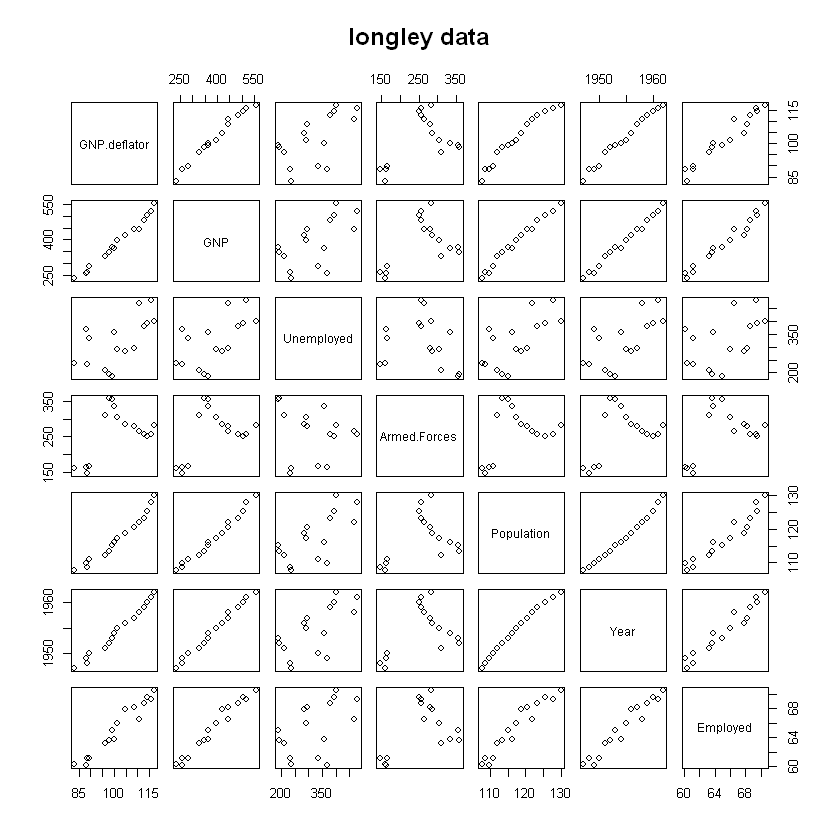

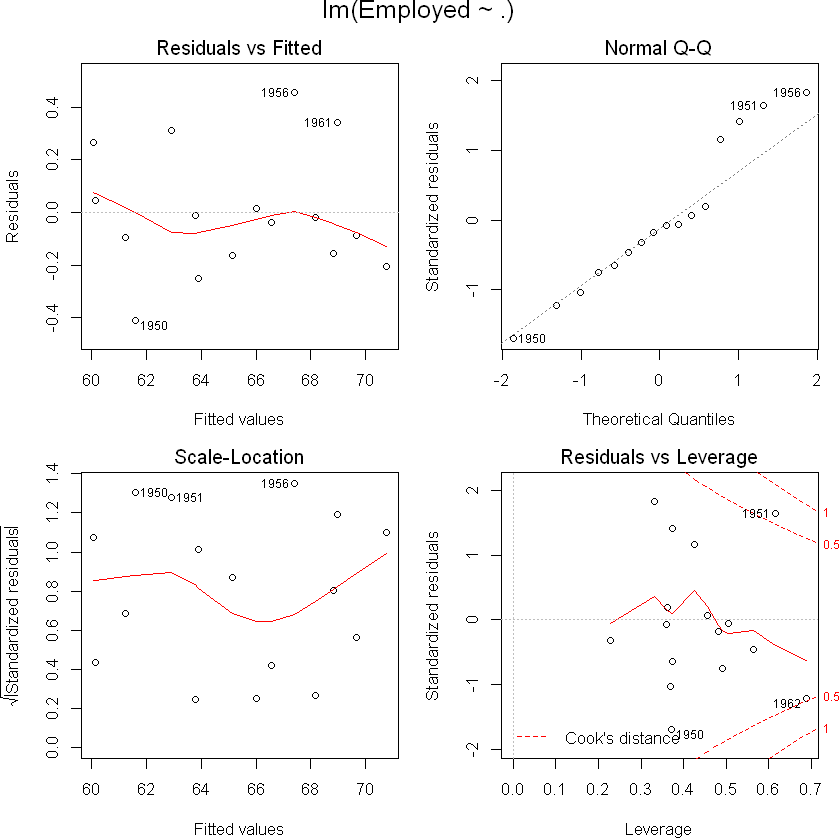

In [5]:
longley.x <- data.matrix(longley[, 1:6])
longley.y <- longley[, "Employed"]
pairs(longley, main = "longley data")
summary(fm1 <- lm(Employed ~ ., data = longley))
opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
            mar = c(4.1, 4.1, 2.1, 1.1))
plot(fm1)
par(opar)